### References

https://medium.com/coinmonks/implementation-of-gradient-descent-in-python-a43f160ec521

https://towardsdatascience.com/implement-gradient-descent-in-python-9b93ed7108d1

### Target Problem
Find the local minima of the function y=(x+5)² starting from the point x = 10

### Visualize 
y=(x+5)²

In [1]:
## libs
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

## samples
num = 100
X = np.linspace(-12.0, 2.0, num)
y = np.power(X + 5, 2)
noise = np.random.randn(num) * 2.5 ## random noise

## plot
plt.figure(figsize = (8,4))
plt.plot(X, y, 'red')
plt.scatter(X, y + noise, c = 'blue', alpha = 0.5)
plt.legend(['target function', 'samples'])
plt.show()

<IPython.core.display.Javascript object>

### Task 1: given function y(x), estimate parameter x at min(y)

Starting from $x = 3$, the goal is to find the $x^{'}$ with which $y$ is at its minimum.

Formally, the optimization functions is:

$x^{'} =  \underset{x\in X}{\operatorname{argmin{[y(x)]}}}$

We can solve the first-order derivative function, let it equals zero, then we get $x^{'} = -5$. This is a deterministic way, only works when the 1st-order derivative equation is available and solvable. Given the derivative, there is another way to do this, through numerical optimization process:

<IPython.core.display.Javascript object>


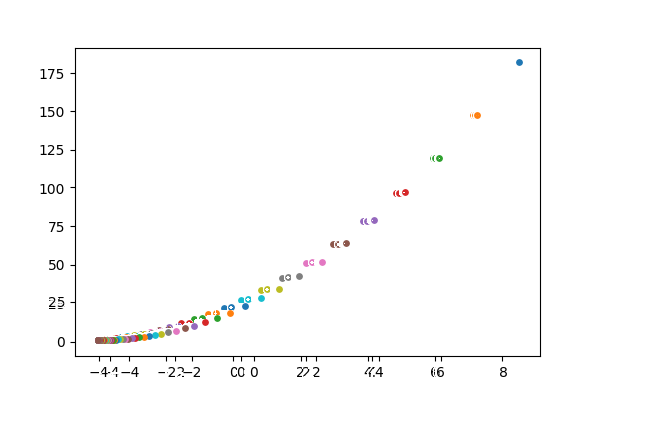

In [2]:
## hyper parameters
lr = 0.05 ## learning rate
thre_delta = 1e-6 ## convergence hyper param
max_iters = 10000 ## max iteration

## loop and update
cur_x = 10
pre_delta = float('inf')
iters = 0

## plot
fig = plt.figure(figsize = (6, 4))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

while pre_delta > thre_delta and iters < max_iters:
    pre_x = cur_x
    cur_x = cur_x - lr * (pre_x + 5) * 2 ## dy/dx
    ## update delta
    pre_delta = abs(cur_x - pre_x)
    ax.scatter(cur_x, (cur_x + 5 )** 2, s = 15)
    fig.canvas.draw() 
 

### Task 2: given observations (X, y), fit a quadratic function

Assuming the function takes the polynomial form: $f(x) = ax^2+bx + c$.

Given $X = \{x_1, x_2, x_3, ..., x_N\}, y = \{y_1, y_2, y_3, ..., y_N\}$, the goal is to fit a quadratic function with minimized empirical error (e.g mean square error). Here 'fit' means finding the optimal values for parameters a, b, and c.

Using the mean square error, he optimization function takes the form of:

$(a^{'},b^{'},c^{'}) = \underset{a, b, c}{\operatorname{argmin}}{\sum_{i=1}^N (f(x_i) - y_i)^2} / N$

It equals to solve: 

$(a^{'},b^{'},c^{'}) = \underset{a, b, c}{\operatorname{argmin}}{\sum_{i=1}^N (f(x_i) - y_i)^2}$

In addition, the loss function (error) has derivatives w.r.t a, b, c as:

$f^{'}(a) = (y^{hat} - y)*x^2$

$f^{'}(b) = (y^{hat} - y)*x$

$f^{'}(c) = (y^{hat} - y)*1$


<IPython.core.display.Javascript object>


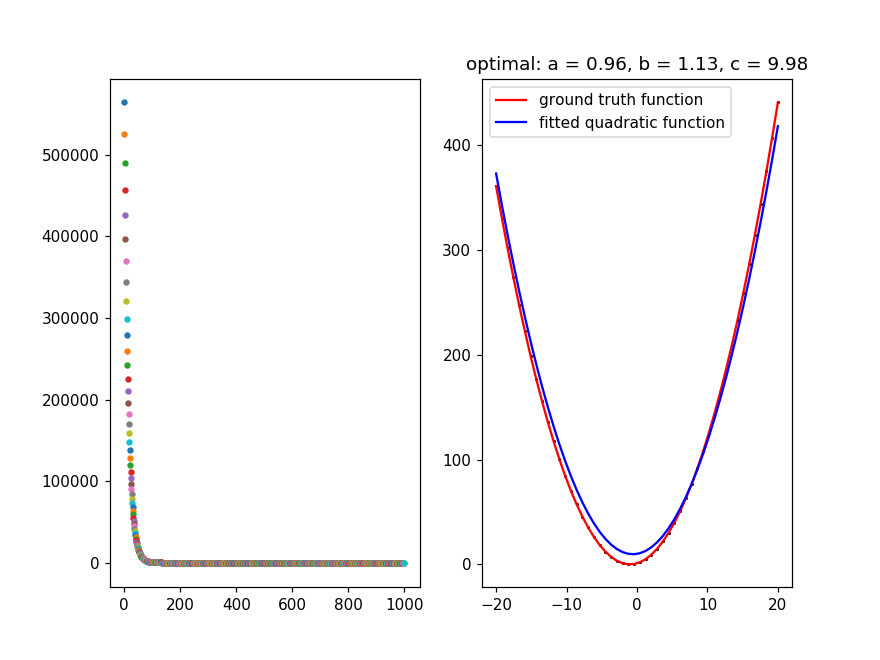

In [8]:
### again define hyper params first
lr = 1e-6 ## learning rate
precision = 1e-6 ## convergence hyper param
max_iters = 1000 ## max iteration

### make dataset
num = 50
a0 = 1
b0 = 2
c0 = 1
X = np.linspace(-20.0, 20.0, num)
y = a0 * np.power(X, 2)  + b0 * X + c0 
noise = np.random.randn(num) * 0 ## random noise

### initialize
iters = 0
cur_error = float('inf')
a = 5 # np.random.randint(5)
b = 1 # np.random.randint(10)
c = 10 # np.random.randint(5)

## plot
fig = plt.figure(figsize = (8, 6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
plt.ion()
fig.show()
fig.canvas.draw()

### fit and update
while iters < max_iters and cur_error > precision:
    
    ## calculate error
    diff = a * np.power(X, 2) + b * X +  c - y - noise
    cur_error = np.power(diff, 2).mean()
    
    ## update a, b, c
    a -= lr * np.multiply(X**2, diff).mean()
    b -= lr * np.multiply(X, diff).mean()
    c -= lr * diff.mean()
    
    ## plots
    ax1.scatter(iters, cur_error, s = 10)    
    ax2.clear()
    ax2.scatter(X, y + noise, s = 1, c = 'black')    
    ax2.plot(X, y , 'red')
    ax2.plot(X, a  * np.power(X, 2)  + b *X +  c , 'blue')
    ax2.legend(['ground truth function', 'fitted quadratic function'])
    ax2.set_title('optimal: a = %.2f, b = %.2f, c = %.2f'%(a, b, c) )
    fig.canvas.draw() 
    
    ## iters
    iters += 1
    
    
 